### Target

![](http://r-statistics.co/screenshots/ggplot_masterlist_11.png)

In [4]:
import pandas as pd
mtcars= pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv") 
mtcars['mpg_z']= ((mtcars['mpg'] - mtcars['mpg'].mean()))/mtcars['mpg'].std()

In [5]:
mean_mpg_z = mtcars['mpg_z'].mean()
mean_mpg_z

6.678685382510707e-16

In [77]:
chart = LayeredChart(mtcars)

In [98]:
from altair import *
c1 = Chart(mtcars).mark_bar(color='black', barSize=1).encode(y=Y('model', sort=SortField(op='mean', order='descending', field='mpg_z')),
                                x=X('mpg_z' )).transform_data(
   calculate=[Formula('Performance', expr.where(expr.df.mpg_z < mean_mpg_z,'Below average','Above average'))],
   
).configure_cell(height=100, width=400).configure_scale(bandSize=22) 

In [99]:
c2 = Chart(mtcars).mark_circle(color='black', size=400).encode(y=Y('model', sort=SortField(op='mean', order='descending', field='mpg_z')),
                                x=X('mpg_z' ), text='mpg_z').transform_data(
   calculate=[Formula('Performance', expr.where(expr.df.mpg_z < mean_mpg_z,'Below average','Above average'))],
   
).configure_cell(height=100, width=400).configure_scale(bandSize=22) 

In [100]:
c3 = Chart(mtcars).mark_text(color='white').encode(y=Y('model', sort=SortField(op='mean', order='descending', field='mpg_z')),
                                x=X('mpg_z' ), text='mpg_z').transform_data(
   calculate=[Formula('Performance', expr.where(expr.df.mpg_z < mean_mpg_z,'Below average','Above average'))],
   
).configure_cell(height=100, width=400).configure_scale(bandSize=22) 

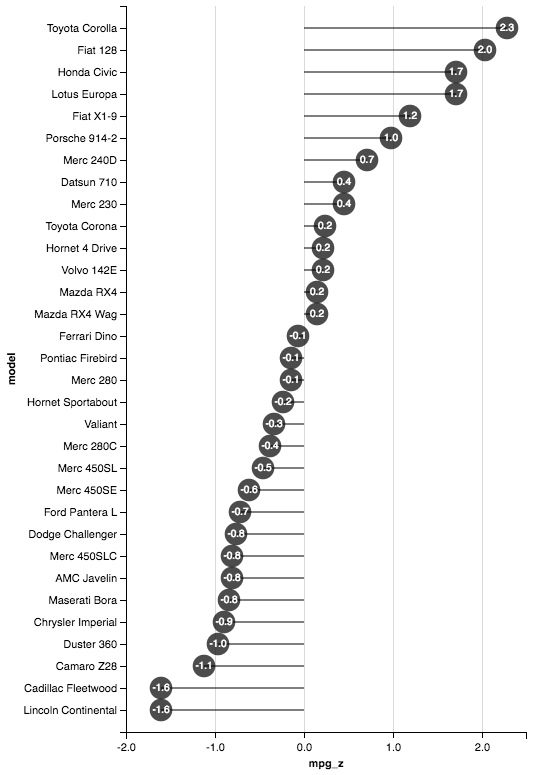

In [101]:
chart.layers = [c1, c2, c3]
chart.configure(numberFormat="0.1f")

Todo

1. can we make it simpler? or, make it a native mark_lollipop?
2. A lot of stuff is redundant across the layers, can we reduce that?
